# Regrese 1

## Zadání 1

1. Načtěte data ze souborů simplreg.txt a fruitohms.txt. Vizualizujte závislosti Y = F(X) v prvním případě a  juice = F(ohms) ve druhém případě pomocí bodového grafu. Uložte grafy jako soubory ve formát png ve dvou oknech (1 řádek a 2 sloupce).
2. Vytvořte jednnoduchý lineární a polynomiální regresní model pro načtená data. Zvyšte stupeň polonymu z 2 na vyšší hodnoty. Vypočítejte kritéria kvality (MSE, RMSE, MAE, R-squared) pro každý případ. Vytvořte grafy kritérií kvality versus stupeň polynomu pro každý soubor dat (2 řádky a 2 sloupce). Uložte grafy jako soubory ve formátu png. Vyberte nejlepší modely pro každý soubor dat na základě vypočítaných kritérií.
3. Vizualizujte výsledky v jednom řádku a dvou sloupcích, přidáním regresní čáry k bodovému grafu - červenou a zelenou barvou. Uložte grafy jako soubory ve formátu png.

In [1]:
# Imports
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

plt.style.use('default')
sns.set_style("whitegrid")

# File structure config
dataset_dir = Path("datasets")
dataset_dir.mkdir(exist_ok=True)
dataset_url = "https://drive.google.com/drive/folders/1hXRpUJKJRl4DhuprUaQMXWuXPwx69yy0"
plots_dir = Path("plots")
plots_dir.mkdir(exist_ok=True)

if not dataset_dir.exists():
    gdown.download_folder(url=dataset_url, output=str(dataset_dir), use_cookies=False)

files = {
    "simplreg": {
        "filename": "simplreg.txt",
        "sep": "\t",
        "x_col": "X",
        "y_col": "Y"
    },
    "fruitohms": {
        "filename": "fruitohms.txt",
        "sep": r"\s+",
        "x_col": "ohms",
        "y_col": "juice"
    }
}

# dataframes dict for reuse
dataframes = {}


for name, props in files.items():
    path = dataset_dir / props["filename"]
    try:
        df = pd.read_csv(path, sep=props["sep"])
        dataframes[name] = {
            "df": df,
            "x_col": props["x_col"],
            "y_col": props["y_col"]
        }
        print(f"\n=== {name.upper()} ===")
        df.info()
        print(df.describe())
    except FileNotFoundError:
        print(f"File not found {path}")
    except pd.errors.ParserError as e:
        print(f"Parsing error in file {path}: {e}")


# Plot settings
plot_configs = []

for name, info in dataframes.items():
    plot_configs.append({
        "data": info["df"],
        "x": info["x_col"],
        "y": info["y_col"],
        "title": f"Scatterplot of {info['x_col']} vs {info['y_col']}",
        "label": f"Dependency of {info['y_col']} on {info['x_col']}"
    })




=== SIMPLREG ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       14 non-null     int64  
 1   Y       14 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 356.0 bytes
               X           Y
count  14.000000   14.000000
mean   57.500000  238.607143
std    20.916501  105.896593
min    25.000000   28.600000
25%    41.250000  172.450000
50%    57.500000  264.350000
75%    73.750000  327.050000
max    90.000000  350.000000

=== FRUITOHMS ===
<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 1 to 127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   juice   128 non-null    float64
 1   ohms    128 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.0 KB
            juice         ohms
count  128.000000   128.000000
mean    35.152344  4360.000000
std    

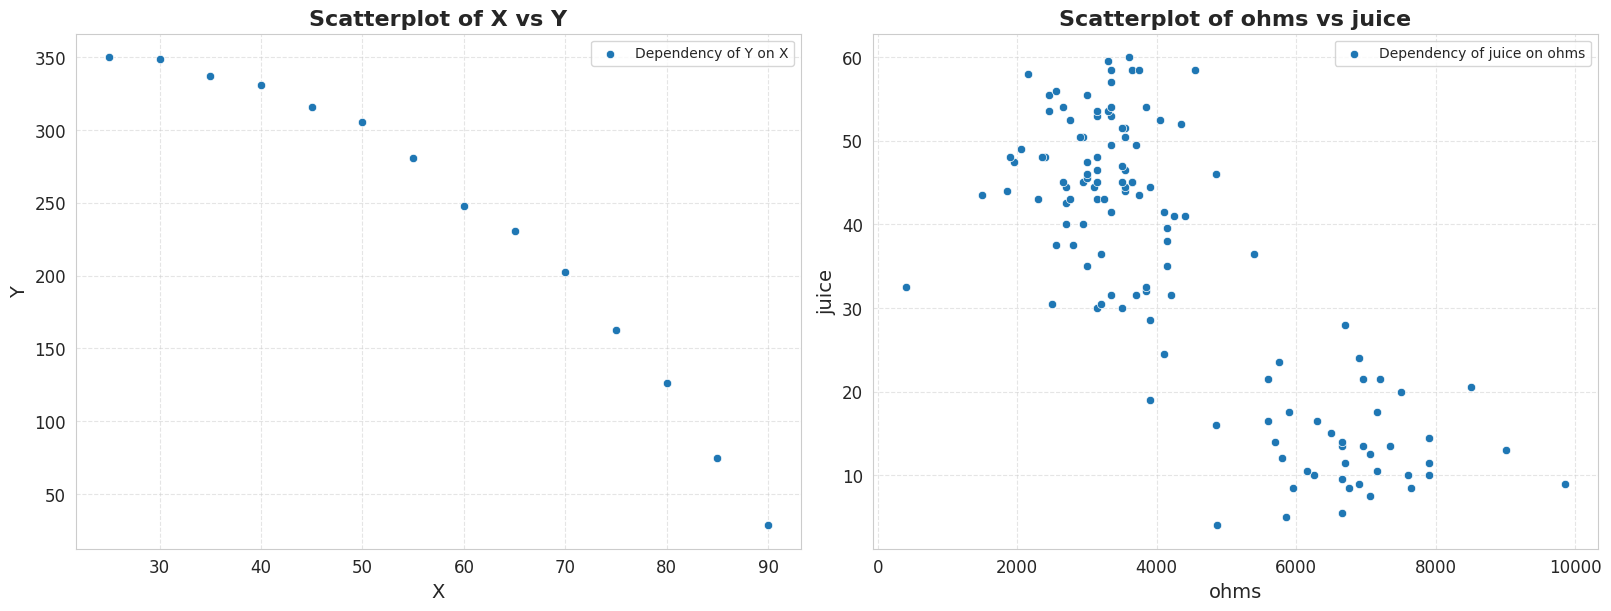

In [2]:
plot_configs = []

for name, info in dataframes.items():
    plot_configs.append({
        "data": info["df"],
        "x": info["x_col"],
        "y": info["y_col"],
        "title": f"Scatterplot of {info['x_col']} vs {info['y_col']}",
        "label": f"Dependency of {info['y_col']} on {info['x_col']}"
    })

fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

for ax, cfg in zip(axes, plot_configs):
    sns.scatterplot(data=cfg["data"], x=cfg["x"], y=cfg["y"], ax=ax, label=cfg["label"])
    ax.set_title(cfg["title"], fontsize=16, fontweight='bold')
    ax.set_xlabel(cfg["x"], fontsize=14)
    ax.set_ylabel(cfg["y"], fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

# Save the combined figure
fig.savefig(plots_dir / "combined_scatterplots.png", dpi=300)

plt.show()

In [3]:
def run_linear_regression(df, x_col, y_col, test_size=0.3, random_state=42):
    X = df[[x_col]].values
    y = df[y_col].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

    return model, metrics

# Run regression on all loaded datasets
for name, info in dataframes.items():
    df = info["df"]
    x_col = info["x_col"]
    y_col = info["y_col"]

    model, metrics = run_linear_regression(df, x_col, y_col)

    print(
        f"\n[{name.upper()}] Linear Regression "
        f"MSE: {metrics['MSE']:.3f}, "
        f"RMSE: {metrics['RMSE']:.3f}, "
        f"MAE: {metrics['MAE']:.3f}, "
        f"R2: {metrics['R2']:.3f}"
    )


[SIMPLREG] Linear Regression MSE: 1035.800, RMSE: 32.184, MAE: 26.869, R2: 0.904

[FRUITOHMS] Linear Regression MSE: 104.032, RMSE: 10.200, MAE: 8.086, R2: 0.634


In [4]:
def run_regressions(df, x_col, y_col, test_size=0.3, random_state=42, max_poly_degree=10):
    X = df[[x_col]].values
    y = df[y_col].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # --- Linear Regression ---
    lin_model = LinearRegression()
    lin_model.fit(X_train, y_train)
    y_pred_lin = lin_model.predict(X_test)

    lin_metrics = {
        "MSE": mean_squared_error(y_test, y_pred_lin),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lin)),
        "MAE": mean_absolute_error(y_test, y_pred_lin),
        "R2": r2_score(y_test, y_pred_lin)
    }

    # --- Polynomial Regression for each degree ---
    poly_results = []

    for degree in range(2, max_poly_degree + 1):
        poly = PolynomialFeatures(degree=degree)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.transform(X_test)

        model = LinearRegression()
        model.fit(X_poly_train, y_train)
        y_pred = model.predict(X_poly_test)

        metrics = {
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "MAE": mean_absolute_error(y_test, y_pred),
            "R2": r2_score(y_test, y_pred)
        }

        poly_results.append({
            "degree": degree,
            "model": model,
            "transformer": poly,
            "metrics": metrics
        })

    # --- Choose best polynomial by MSE ---
    best_poly = min(poly_results, key=lambda r: r["metrics"]["MSE"])

    return lin_model, lin_metrics, poly_results, best_poly

for name, info in dataframes.items():
    df = info["df"]
    x_col = info["x_col"]
    y_col = info["y_col"]

    lin_model, lin_metrics, poly_results, best_poly = run_regressions(df, x_col, y_col)

    print(f"\n[{name.upper()}] Linear Regression:")
    print(f"  MSE: {lin_metrics['MSE']:.3f}, RMSE: {lin_metrics['RMSE']:.3f}, "
          f"MAE: {lin_metrics['MAE']:.3f}, R2: {lin_metrics['R2']:.3f}")

    print(f"\n[{name.upper()}] Polynomial Regression (per degree):")
    for result in poly_results:
        deg = result["degree"]
        m = result["metrics"]
        print(f"  Degree {deg} -> MSE: {m['MSE']:.3f}, RMSE: {m['RMSE']:.3f}, "
              f"MAE: {m['MAE']:.3f}, R2: {m['R2']:.3f}")

    best_deg = best_poly["degree"]
    best_m = best_poly["metrics"]
    print(f"\n[{name.upper()}] Best Polynomial Degree: {best_deg}")
    print(f"  MSE: {best_m['MSE']:.3f}, RMSE: {best_m['RMSE']:.3f}, "
          f"MAE: {best_m['MAE']:.3f}, R2: {best_m['R2']:.3f}")



[SIMPLREG] Linear Regression:
  MSE: 1035.800, RMSE: 32.184, MAE: 26.869, R2: 0.904

[SIMPLREG] Polynomial Regression (per degree):
  Degree 2 -> MSE: 27.288, RMSE: 5.224, MAE: 4.751, R2: 0.997
  Degree 3 -> MSE: 24.911, RMSE: 4.991, MAE: 4.779, R2: 0.998
  Degree 4 -> MSE: 21.997, RMSE: 4.690, MAE: 4.025, R2: 0.998
  Degree 5 -> MSE: 52.694, RMSE: 7.259, MAE: 6.411, R2: 0.995
  Degree 6 -> MSE: 351.951, RMSE: 18.760, MAE: 13.268, R2: 0.967
  Degree 7 -> MSE: 308.735, RMSE: 17.571, MAE: 14.483, R2: 0.971
  Degree 8 -> MSE: 579.869, RMSE: 24.080, MAE: 18.929, R2: 0.946
  Degree 9 -> MSE: 1749.507, RMSE: 41.827, MAE: 29.513, R2: 0.838
  Degree 10 -> MSE: 5879.225, RMSE: 76.676, MAE: 49.764, R2: 0.457

[SIMPLREG] Best Polynomial Degree: 4
  MSE: 21.997, RMSE: 4.690, MAE: 4.025, R2: 0.998

[FRUITOHMS] Linear Regression:
  MSE: 104.032, RMSE: 10.200, MAE: 8.086, R2: 0.634

[FRUITOHMS] Polynomial Regression (per degree):
  Degree 2 -> MSE: 111.218, RMSE: 10.546, MAE: 8.156, R2: 0.608
  Degr

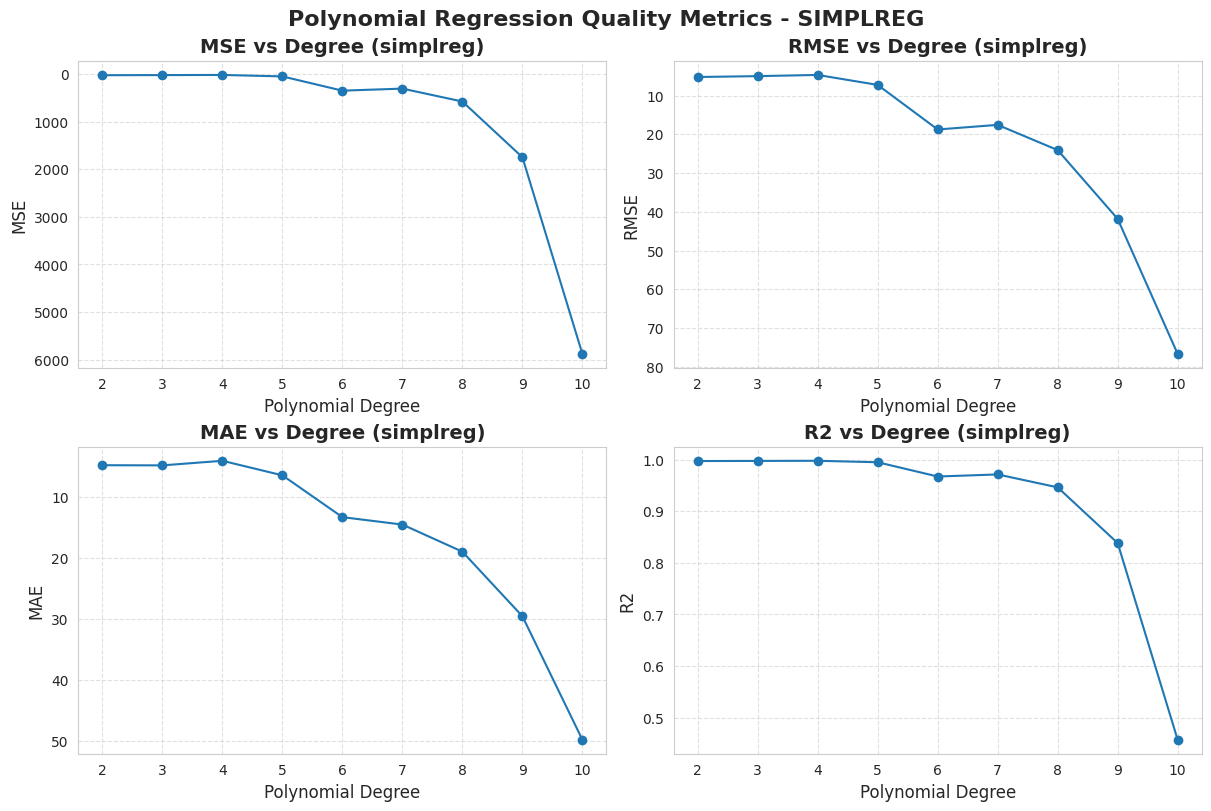

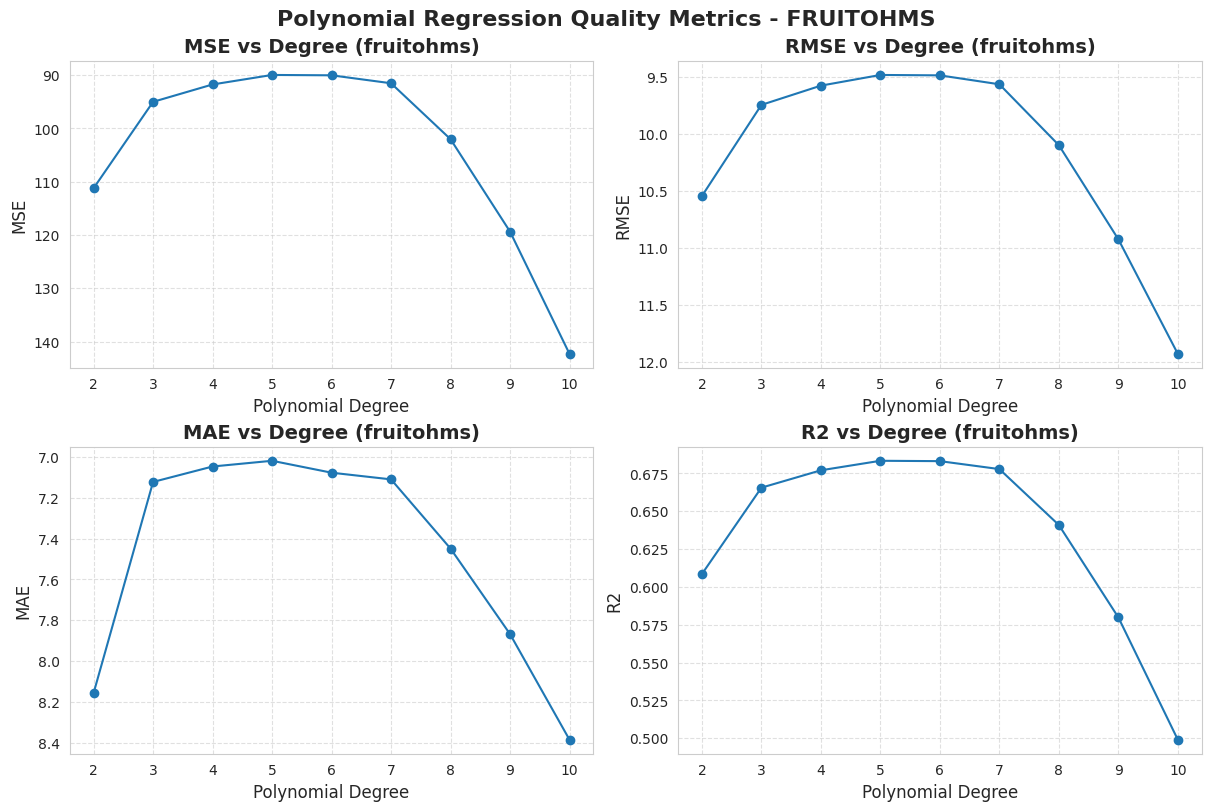

In [5]:
metrics_names = ["MSE", "RMSE", "MAE", "R2"]

for name, info in dataframes.items():
    df = info["df"]
    x_col = info["x_col"]
    y_col = info["y_col"]

    # Run regressions to get poly results only
    _, _, poly_results, _ = run_regressions(df, x_col, y_col)

    degrees = [res["degree"] for res in poly_results]
    mse_vals = [res["metrics"]["MSE"] for res in poly_results]
    rmse_vals = [res["metrics"]["RMSE"] for res in poly_results]
    mae_vals = [res["metrics"]["MAE"] for res in poly_results]
    r2_vals = [res["metrics"]["R2"] for res in poly_results]

    metric_values = [mse_vals, rmse_vals, mae_vals, r2_vals]

    fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        ax.plot(degrees, metric_values[i], marker='o', linestyle='-')
        ax.set_xlabel("Polynomial Degree", fontsize=12)
        ax.set_ylabel(metrics_names[i], fontsize=12)
        ax.set_title(f"{metrics_names[i]} vs Degree ({name})", fontsize=14, fontweight='bold')
        ax.grid(True, linestyle='--', alpha=0.6)
        if metrics_names[i] != "R2":
            ax.invert_yaxis()  # For error metrics, lower is better

    # Save the plot to PNG file
    plt.suptitle(f"Polynomial Regression Quality Metrics - {name.upper()}", fontsize=16, fontweight='bold')
    filename = f"quality_metrics_{name}.png"
    plt.savefig(plots_dir / filename, dpi=300)
    plt.show()

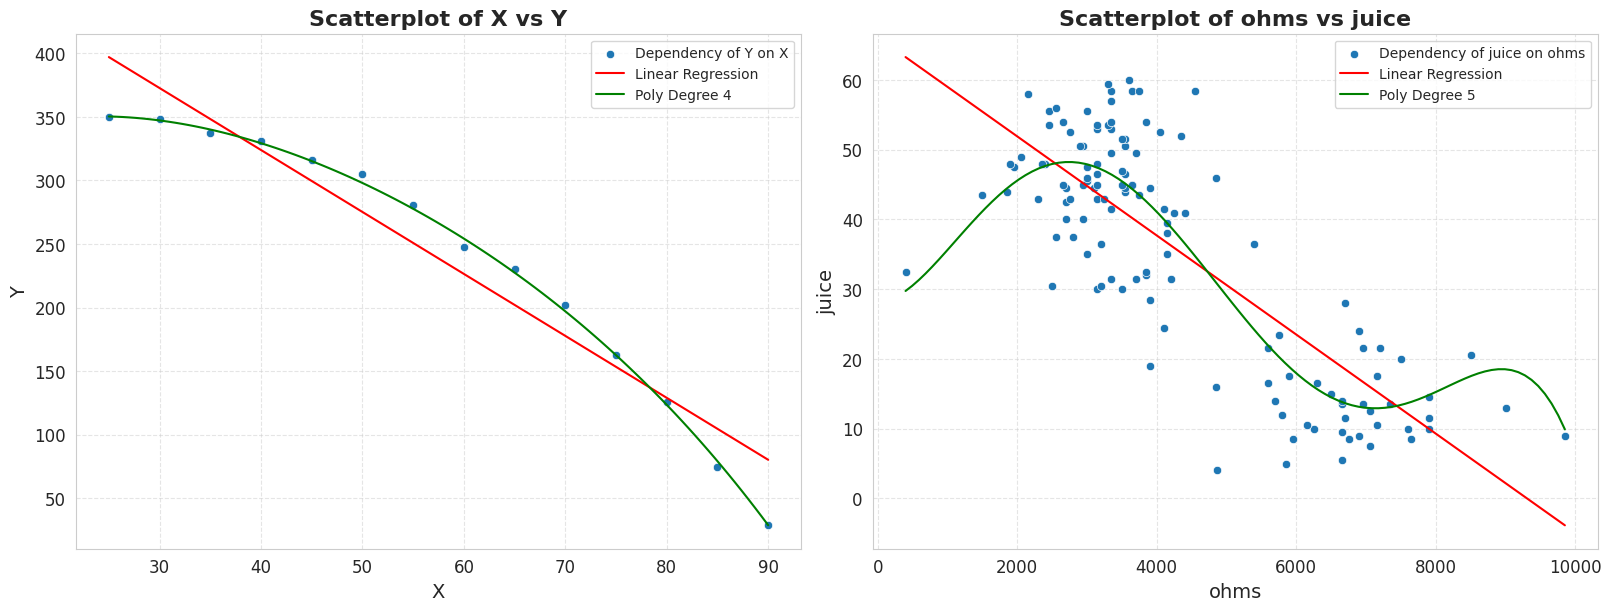

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

for ax, cfg in zip(axes, plot_configs):
    df = cfg["data"]
    x_col = cfg["x"]
    y_col = cfg["y"]

    # Scatter plot
    sns.scatterplot(data=df, x=x_col, y=y_col, ax=ax, label=cfg["label"])

    # Prepare X for regression lines (sorted for smooth lines)
    X_plot = np.linspace(df[x_col].min(), df[x_col].max(), 100).reshape(-1, 1)

    # Get data for fitting
    X = df[[x_col]].values
    y = df[y_col].values

    # --- Linear Regression line ---
    lin_model = LinearRegression()
    lin_model.fit(X, y)
    y_lin_pred = lin_model.predict(X_plot)
    ax.plot(X_plot, y_lin_pred, color='red', label='Linear Regression')

    # --- Polynomial Regression line ---
    # Run polynomial regression with best degree from earlier
    _, _, poly_results, best_poly = run_regressions(df, x_col, y_col)

    poly = best_poly["transformer"]
    poly_model = best_poly["model"]

    X_poly_plot = poly.transform(X_plot)
    y_poly_pred = poly_model.predict(X_poly_plot)
    ax.plot(X_plot, y_poly_pred, color='green', label=f'Poly Degree {best_poly["degree"]}')

    # Axis titles and styling
    ax.set_title(cfg["title"], fontsize=16, fontweight='bold')
    ax.set_xlabel(x_col, fontsize=14)
    ax.set_ylabel(y_col, fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()

# Save combined figure
fig.savefig(plots_dir / "scatter_with_regression_lines.png", dpi=300)
plt.show()
